In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

Defaulting to user installation because normal site-packages is not writeable


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
'''x_train = x_train[0]
img_len , img_wid = x_train.shape
print('Size of input image:',img_len,'x',img_wid)'''

"x_train = x_train[0]\nimg_len , img_wid = x_train.shape\nprint('Size of input image:',img_len,'x',img_wid)"

In [6]:
''' c. Define the network architecture using Keras'''

' c. Define the network architecture using Keras'

In [8]:
from keras.models import Sequential
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
'''d. Train the model using SGD'''

'd. Train the model using SGD'

In [11]:
model.compile(optimizer="sgd",
loss = "sparse_categorical_crossentropy",  
metrics=['accuracy'])

In [12]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8370 - loss: 0.6413 - val_accuracy: 0.9061 - val_loss: 0.3530
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9060 - loss: 0.3361 - val_accuracy: 0.9171 - val_loss: 0.2923
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9188 - loss: 0.2875 - val_accuracy: 0.9280 - val_loss: 0.2596
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9277 - loss: 0.2566 - val_accuracy: 0.9328 - val_loss: 0.2338
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9345 - loss: 0.2333 - val_accuracy: 0.9376 - val_loss: 0.2163
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9401 - loss: 0.2145 - val_accuracy: 0.9412 - val_loss: 0.2016
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9442 - loss: 0.1986 - val_accuracy: 0.9441 - val_loss: 0.1884
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9481 - loss: 0.1853 - 

In [13]:
''' e. Evaluate the network'''

' e. Evaluate the network'

In [14]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9531 - loss: 0.1600
Loss=0.160
Accuracy=0.953


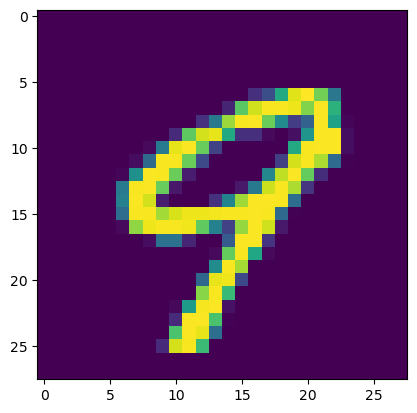

In [19]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [17]:
''' f. Plot the training loss and accuracy'''

' f. Plot the training loss and accuracy'

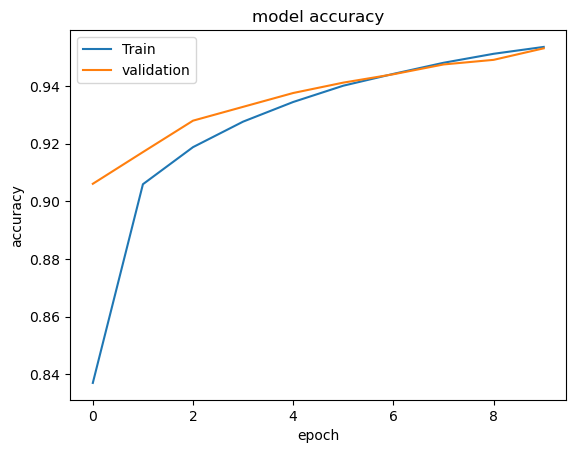

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

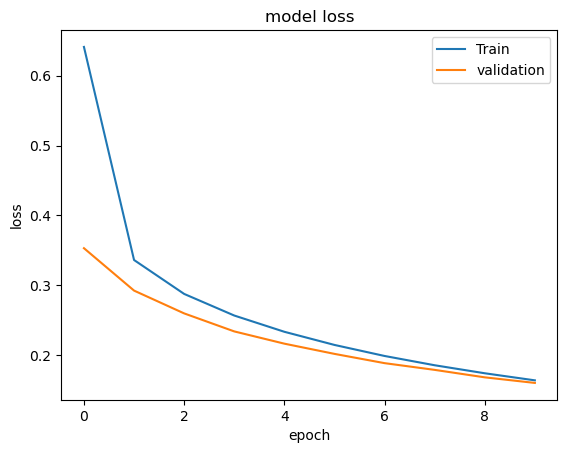

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper right')
plt.show()